
# **📝 Employee Attrition & Performance Prediction(HR Analytics)**
Employee attrition refers to the unexpected reduction in workforce due to factors such as resignation, retirement, loss of work capacity, or unforeseen circumstances like death. High attrition rates can strain internal resources and negatively impact a company's productivity and operations.

## Purpose
This project aims to address employee attrition from multiple perspectives, focusing on both analysis and actionable solutions:

Identify Key Drivers:
Analyze the factors that significantly influence employee attrition, such as job satisfaction, work-life balance, compensation, and departmental dynamics.
Provide actionable insights to HR teams for targeted interventions.

Predict Employee Attrition:
Develop a robust machine learning model to predict whether an employee is likely to leave the organization.
Enable proactive decision-making to retain high-performing and at-risk employees.

Improve Organizational Efficiency:
Highlight areas of improvement, such as better management practices, enhanced employee benefits, or optimized job roles.
Support informed resource planning and reduce operational disruptions caused by high attrition rates.

Understand Workforce Dynamics:
Evaluate trends across different demographics, job roles, and departments to identify groups more prone to attrition.
Foster a data-driven culture in managing employee satisfaction and retention.

# **DATA LOADING**

In [ ]:

# Importing necessary libraries for data manipulation, visualization, and modeling.

# Libraries for data handling and analysis
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations

# Libraries for visualization
import seaborn as sns  # For static visualizations
import matplotlib.pyplot as plt  # For plotting
from plotly.subplots import make_subplots  # For creating complex subplots
import plotly.graph_objects as go  # For interactive visualizations
from plotly.offline import iplot  # For rendering Plotly visualizations offline

# Libraries for machine learning tasks
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.datasets import make_classification  # For generating synthetic datasets
from sklearn import metrics  # For evaluating model performance

# Justification for library usage:
# - `pandas` and `numpy` are essential for efficient data manipulation and preprocessing.
# - `seaborn` and `matplotlib` are used for clear and interpretable visualizations.
# - `plotly` is included for creating interactive and visually appealing charts for exploratory data analysis (EDA).
# - `sklearn` provides tools for splitting datasets and evaluating machine learning models.

# Insights:
# - Importing these libraries ensures that the pipeline covers the entire process, from data loading and visualization to model evaluation.
# - Combining static and interactive visualizations helps in better understanding and communication of insights.



In [ ]:
# Loading the dataset into a pandas DataFrame
data = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Justification for this step:
# - The dataset is loaded using pandas, which is a powerful library for data manipulation and analysis.
# - The dataset path points to the HR employee attrition dataset in CSV format.

# Insights:
# - This dataset contains information about employees and their attributes, which will be used to analyze attrition patterns and build predictive models.
# - Understanding the dataset's structure and content is crucial for effective analysis and preprocessing.



In [ ]:
# Displaying the first few rows of the dataset
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# Inspecting the dataset structure and metadata
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Summary Statistics of Numerical Data

In [ ]:
# Display basic information
data.describe()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Summary Statistics of Categorical Data

In [ ]:
# Identifying categorical columns and analyzing their distribution

# Extracting columns with categorical data
cat_cols = data.select_dtypes(include=object).columns.tolist()

# Creating a DataFrame to analyze the frequency of categorical values
cat_df = pd.DataFrame(
    data[cat_cols].melt(var_name='column', value_name='value')  # Reshaping data for value counts
    .value_counts()  # Counting occurrences of each category
).rename(columns={0: 'count'}).sort_values(by=['column', 'count'])

# Displaying summary statistics of categorical columns
display(data.select_dtypes(include=object).describe())

# Displaying the frequency counts of categorical values
display(cat_df)

# Justification for this step:
# - Categorical columns are identified using `select_dtypes(include=object)`.
# - Frequency analysis helps understand the distribution of categorical values, including identifying any imbalanced categories.


,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


count
column         value                           
Attrition      Yes                          237
               No                          1233
BusinessTravel Non-Travel                   150
               Travel_Frequently            277
               Travel_Rarely               1043
Department     Human Resources               63
               Sales                        446
               Research & Development       961
EducationField Human Resources               27
               Other                         82
               Technical Degree             132
               Marketing                    159
               Medical                      464
               Life Sciences                606
Gender         Female                       588
               Male                         882
JobRole        Human Resources               52
               Research Director             80
               Sales Representative          83
               Manager                      102
               Healthcare Representative    131
               Manufacturing Director       145
               Laboratory Technician        259
               Research Scientist           292
               Sales Executive              326
MaritalStatus  Divorced                     327
               Single                       470
               Married                      673
Over18         Y                           1470
OverTime       Yes                          416
               No                          1054

# DATA PREPROCESSING

In [ ]:
# Creating a copy of the dataset for further processing
df = pd.DataFrame(data)

In [ ]:
# Extracting categorical columns for analysis
df1 = df.select_dtypes('object')
df1


,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [ ]:
# Extracting numerical columns for analysis
df2 = df.select_dtypes('int64')
df2


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,...,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
# Descriptive statistics for categorical columns
df1.describe().T


,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


In [ ]:
# Descriptive statistics for numerical columns
df.describe(include='int64').T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [ ]:
#check for NaN values
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [ ]:
# Checking for duplicate rows in the dataset
have_duplicate_rows = df.duplicated().any()


In [ ]:
# Removing 4 columns
df = df.drop(['Over18', 'EmployeeNumber','EmployeeCount','StandardHours'],axis=1)

In [ ]:
# To separate categorical and numerical columns
cat = df.select_dtypes(['object']).columns
num = df.select_dtypes(['number']).columns
print(cat)
print(num)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [ ]:
# Displaying unique values for each categorical column
for i in cat:
    print('Unique values of', i, set(df[i]))

Unique values of Attrition {'Yes', 'No'}
Unique values of BusinessTravel {'Travel_Rarely', 'Travel_Frequently', 'Non-Travel'}
Unique values of Department {'Research & Development', 'Human Resources', 'Sales'}
Unique values of EducationField {'Life Sciences', 'Other', 'Human Resources', 'Technical Degree', 'Medical', 'Marketing'}
Unique values of Gender {'Male', 'Female'}
Unique values of JobRole {'Sales Executive', 'Manufacturing Director', 'Sales Representative', 'Manager', 'Healthcare Representative', 'Laboratory Technician', 'Human Resources', 'Research Scientist', 'Research Director'}
Unique values of MaritalStatus {'Single', 'Married', 'Divorced'}
Unique values of OverTime {'Yes', 'No'}


# DATA VISUALIZATION

<ipython-input-232-fa672d2f4fc7>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




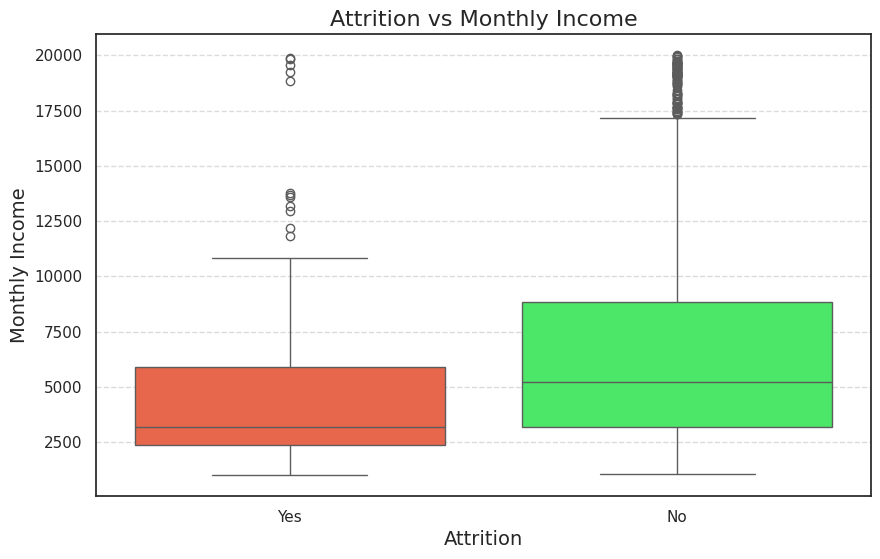

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
plt.figure(figsize=(10, 6))

# Create the boxplot using Seaborn
sns.boxplot(
    data=data,
    x='Attrition',
    y='MonthlyIncome',
    palette={'Yes': '#FF5733', 'No': '#33FF57'}  # Custom colors
)

# Customize the layout
plt.title('Attrition vs Monthly Income', fontsize=16)
plt.xlabel('Attrition', fontsize=14)
plt.ylabel('Monthly Income', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#FFFFFF')  # White background for the plot area

# Show the plot
plt.show()


**Key Observation:** Employees who left the organization generally have a lower median monthly income compared to those who stayed, indicating a potential link between lower income and higher attrition. The income range is broader for those who stayed, suggesting greater salary variance. Outliers with high incomes are present in both groups, particularly among those who left. This highlights the need to evaluate salary structures to improve retention.

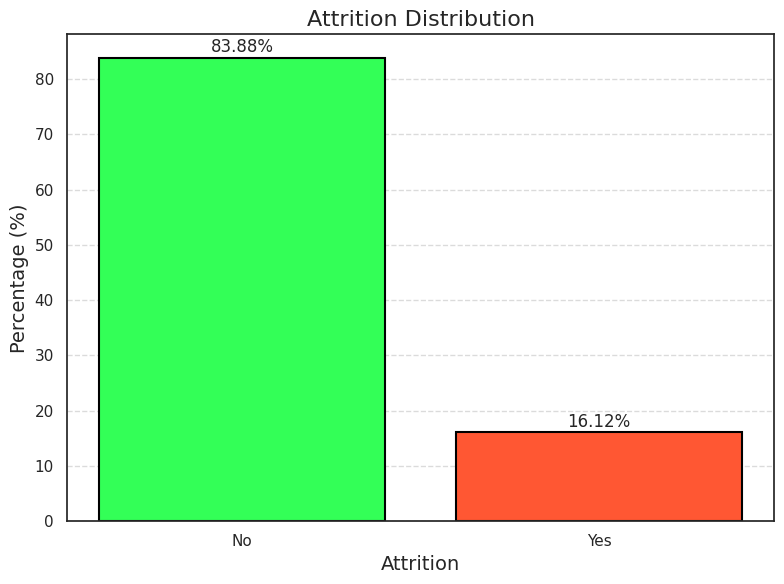

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `data` is your DataFrame
# Prepare data for Attrition distribution
attrition_counts = data['Attrition'].value_counts(normalize=True).mul(100).rename('Percent').reset_index()
attrition_counts.rename(columns={'index': 'Attrition'}, inplace=True)

# Bar Chart using Matplotlib
plt.figure(figsize=(8, 6))
bars = plt.bar(
    attrition_counts['Attrition'],
    attrition_counts['Percent'],
    color=['#33FF57', '#FF5733'],  # Custom colors
    edgecolor='black',  # Black edges for bars
    linewidth=1.5
)

# Add percentage labels on top of each bar
for bar, percent in zip(bars, attrition_counts['Percent']):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 1,
        f'{percent:.2f}%',
        ha='center',
        fontsize=12
    )

# Customize layout
plt.title("Attrition Distribution", fontsize=16)
plt.xlabel("Attrition", fontsize=14)
plt.ylabel("Percentage (%)", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#FFFFFF')  # White background for the plot area

# Show the chart
plt.tight_layout()
plt.show()


**Key Observation**:The dataset shows a **clear imbalance** in the target variable Attrition, where
about 84% of employees belong to the No class (Current Employees).
16% of employees belong to the Yes class (Former Employees).
This imbalance indicates that employees leaving the organization is relatively rare, which aligns with real-world scenarios where the majority of employees typically stay.

Potential Challenges:

The model might be biased toward predicting the majority class (No), leading to poor detection of employees likely to leave.
Metrics like accuracy may give a misleading impression of model performance due to the skewed distribution.

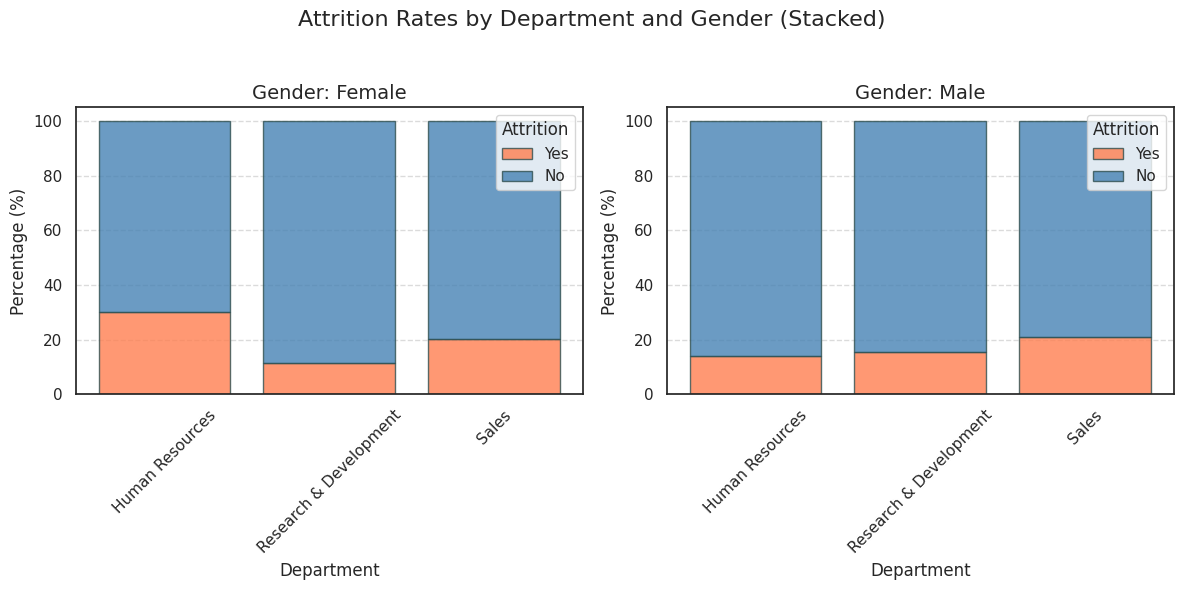

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'data' is your DataFrame

# Create plot_df DataFrame (example)
plot_df = data.groupby(['Department', 'Attrition', 'Gender'])['EmployeeCount'].sum().reset_index()
plot_df['Percent'] = plot_df.groupby(['Department', 'Gender'])['EmployeeCount'].transform(lambda x: (x / x.sum() * 100).round(2))

# Pivot the data for easier plotting with stacked bars
pivot_df = plot_df.pivot_table(index=['Department', 'Gender'], columns='Attrition', values='Percent').reset_index()

# Define a custom color palette
colors = {'Yes': '#FF7F50', 'No': '#4682B4'}

# Create a stacked bar chart
plt.figure(figsize=(12, 6))

# Iterate through genders to create separate subplots
genders = pivot_df['Gender'].unique()
for i, gender in enumerate(genders):
    ax = plt.subplot(1, len(genders), i + 1)
    subset = pivot_df[pivot_df['Gender'] == gender]
    bottom = None
    for attrition in ['Yes', 'No']:
        if attrition in subset.columns:
            plt.bar(
                subset['Department'],
                subset[attrition],
                bottom=bottom,
                label=attrition,
                color=colors[attrition],
                edgecolor='#2F4F4F',
                linewidth=1,
                alpha=0.8
            )
            bottom = subset[attrition] if bottom is None else bottom + subset[attrition]
    plt.title(f'Gender: {gender}', fontsize=14)
    plt.xlabel('Department', fontsize=12)
    plt.ylabel('Percentage (%)', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='Attrition')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and show the plot
plt.suptitle('Attrition Rates by Department and Gender (Stacked)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


**Key Observation:** Women in Human Resources experienced the highest amount of turnover, with nearly 1 out of every 3 women in HR leaving the company. For men, the highest turnover occurred in the Sales department.

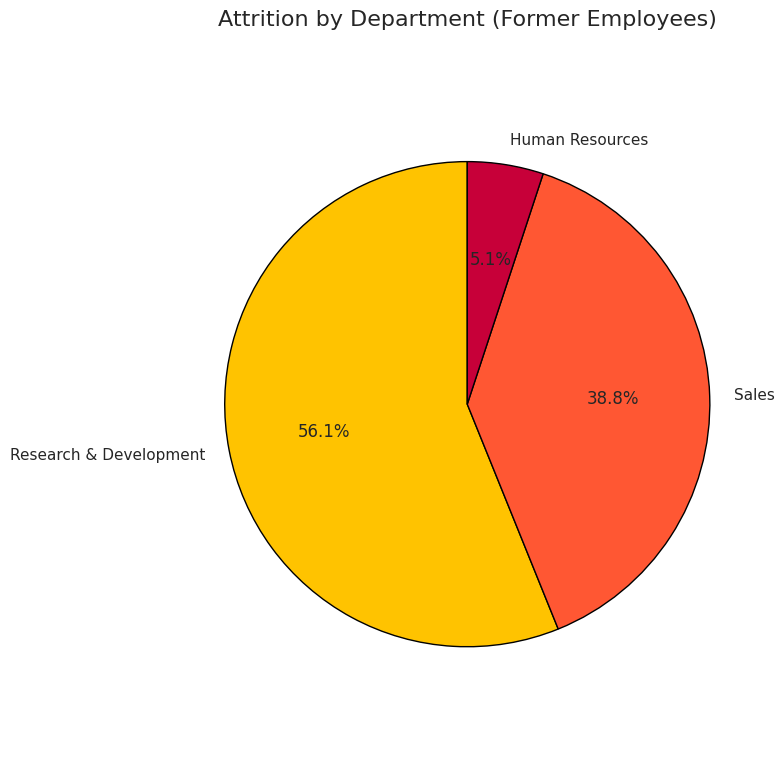

In [ ]:
import matplotlib.pyplot as plt

# Prepare data for Pie Chart: Attrition by Department
plot_df2 = data[data.Attrition == 'Yes']['Department'].value_counts(normalize=True).mul(100).rename('Percent').reset_index()
plot_df2.rename(columns={'index': 'Department'}, inplace=True)

# Pie Chart using Matplotlib
plt.figure(figsize=(8, 8))

# Create the pie chart
plt.pie(
    plot_df2['Percent'],
    labels=plot_df2['Department'],
    autopct='%1.1f%%',  # Format to show percentages
    startangle=90,  # Rotate pie chart for better orientation
    colors=['#FFC300', '#FF5733', '#C70039'],  # Custom colors
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}  # Add black edges
)

# Customize the chart
plt.title("Attrition by Department (Former Employees)", fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures pie chart is circular

# Show the chart
plt.tight_layout()
plt.show()


**Key Observation:** The majority of former employees (56.1%) are from the Research & Development department, indicating the highest attrition, followed by Sales at 38.8%, likely due to high-pressure targets or inconsistent incentives. Human Resources has the lowest attrition rate at 5.06%, suggesting better retention. Retention strategies should prioritize the Research & Development and Sales departments to address key attrition drivers.

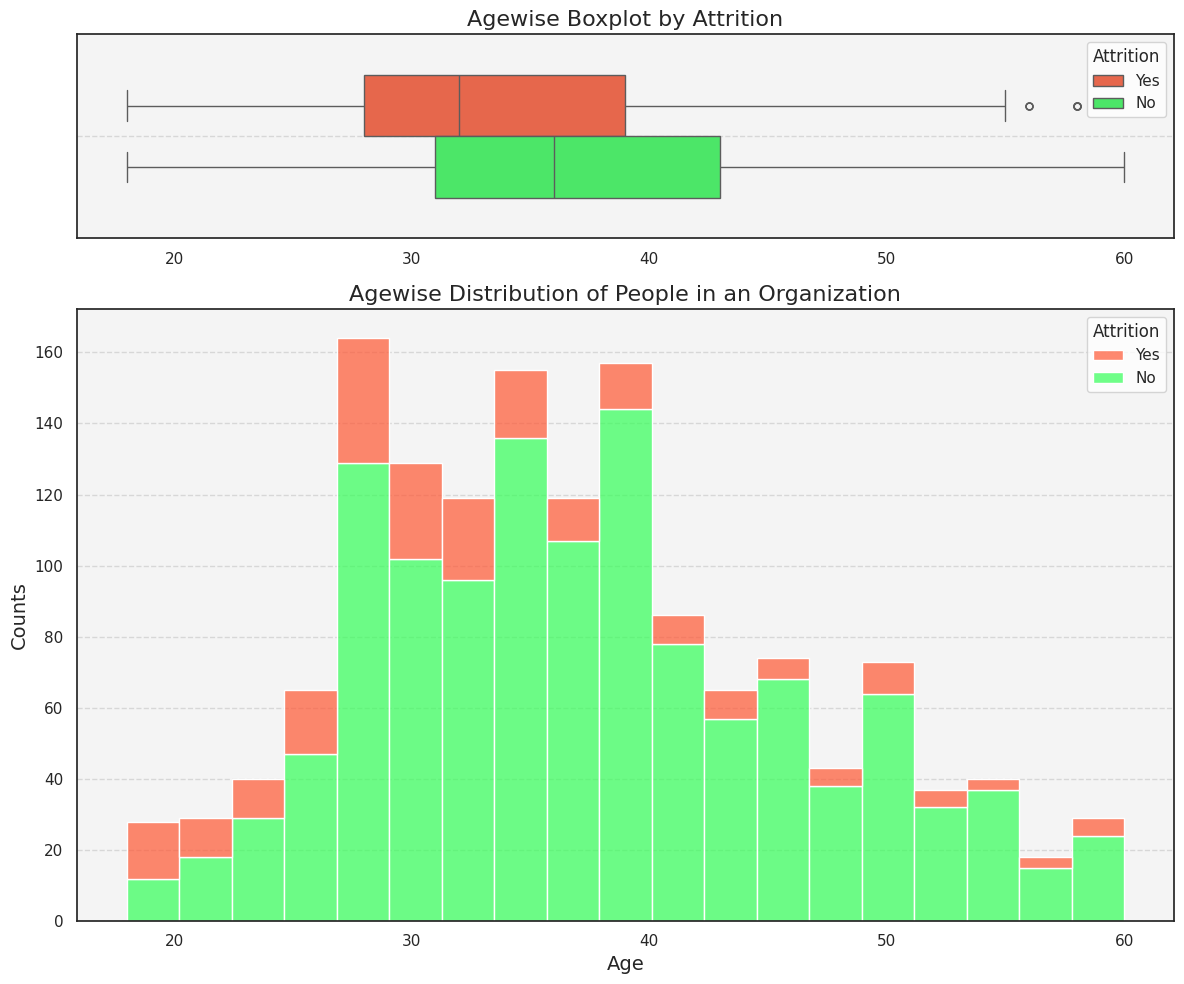

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure with subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10), gridspec_kw={'height_ratios': [1, 3]})

# Create the boxplot on the top subplot
sns.boxplot(
    data=data,
    x='Age',
    hue='Attrition',
    ax=axes[0],
    palette={'Yes': '#FF5733', 'No': '#33FF57'},
    dodge=True,  # Separate boxplots for each category
    width=0.6,
    fliersize=5  # Keep outliers visible
)
axes[0].set_title('Agewise Boxplot by Attrition', fontsize=16)
axes[0].set_xlabel('')
axes[0].set_ylabel('')

# Remove unnecessary elements for clarity
axes[0].legend(title='Attrition', loc='upper right')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Create the histogram on the bottom subplot
sns.histplot(
    data=data,
    x='Age',
    hue='Attrition',
    kde=False,
    multiple='stack',  # Stacked bars for 'Yes' and 'No'
    palette={'Yes': '#FF5733', 'No': '#33FF57'},
    alpha=0.7,
    ax=axes[1]
)
axes[1].set_title('Agewise Distribution of People in an Organization', fontsize=16)
axes[1].set_xlabel('Age', fontsize=14)
axes[1].set_ylabel('Counts', fontsize=14)

# Customize the layout
for ax in axes:
    ax.set_facecolor('#F4F4F4')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


**Key Observation:**
The attrition is maximum between the age groups 28-32. The attrition rate keeps on falling with increasing age, as people look after stability in their jobs at these point of times. Also at a very younger age, i.e. from 18-20, the chances of an employee leaving the organization is far more- since they are exploring at that point of time. It reaches a break even point at the age of 21.

<ipython-input-238-98d1bd5c2250>:5: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



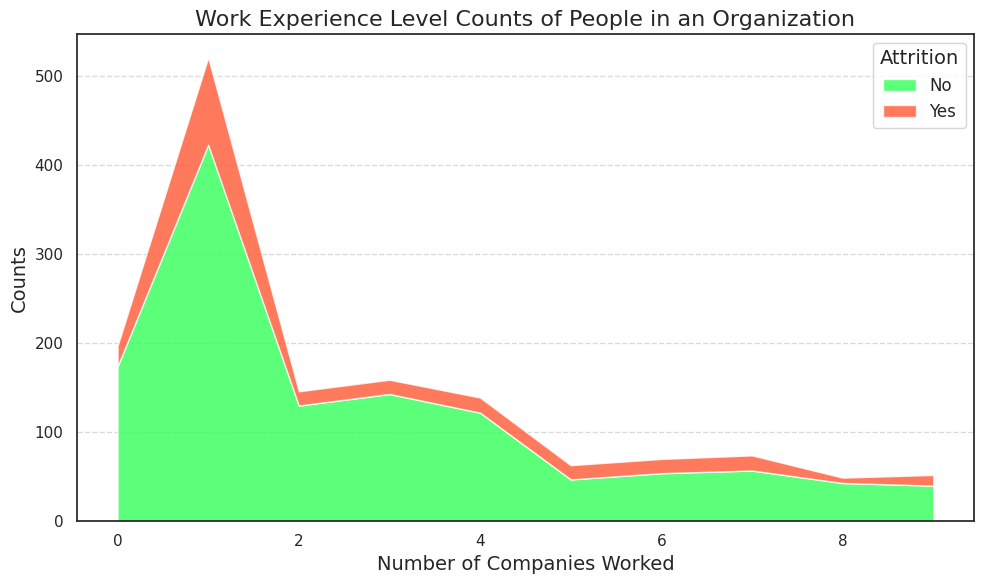

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Group and count data based on NumCompaniesWorked and Attrition
ncwrd_att = data.groupby(['NumCompaniesWorked', 'Attrition']).apply(lambda x: x['DailyRate'].count()).reset_index(name='Counts')

# Pivot the data for easy plotting
pivot_data = ncwrd_att.pivot(index='NumCompaniesWorked', columns='Attrition', values='Counts').fillna(0)

# Define colors for Attrition categories
colors = {'Yes': '#FF5733', 'No': '#33FF57'}

# Create the area plot
plt.figure(figsize=(10, 6))

plt.stackplot(
    pivot_data.index,
    pivot_data['No'],  # Non-attrition counts
    pivot_data['Yes'],  # Attrition counts
    labels=['No', 'Yes'],
    colors=[colors['No'], colors['Yes']],
    alpha=0.8
)

# Customize the layout
plt.title('Work Experience Level Counts of People in an Organization', fontsize=16)
plt.xlabel('Number of Companies Worked', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.legend(title='Attrition', fontsize=12, title_fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#FFFFFF')

# Show the plot
plt.tight_layout()
plt.show()


**Key Observations** As seen from the chart above, clearly, employees who started their career with the company- or have switched to the company in the initial years of their career, have a higher chances of leaving the organization to a different company. People who have gained much experience- working in multiple companies tend to stay in the company they join.

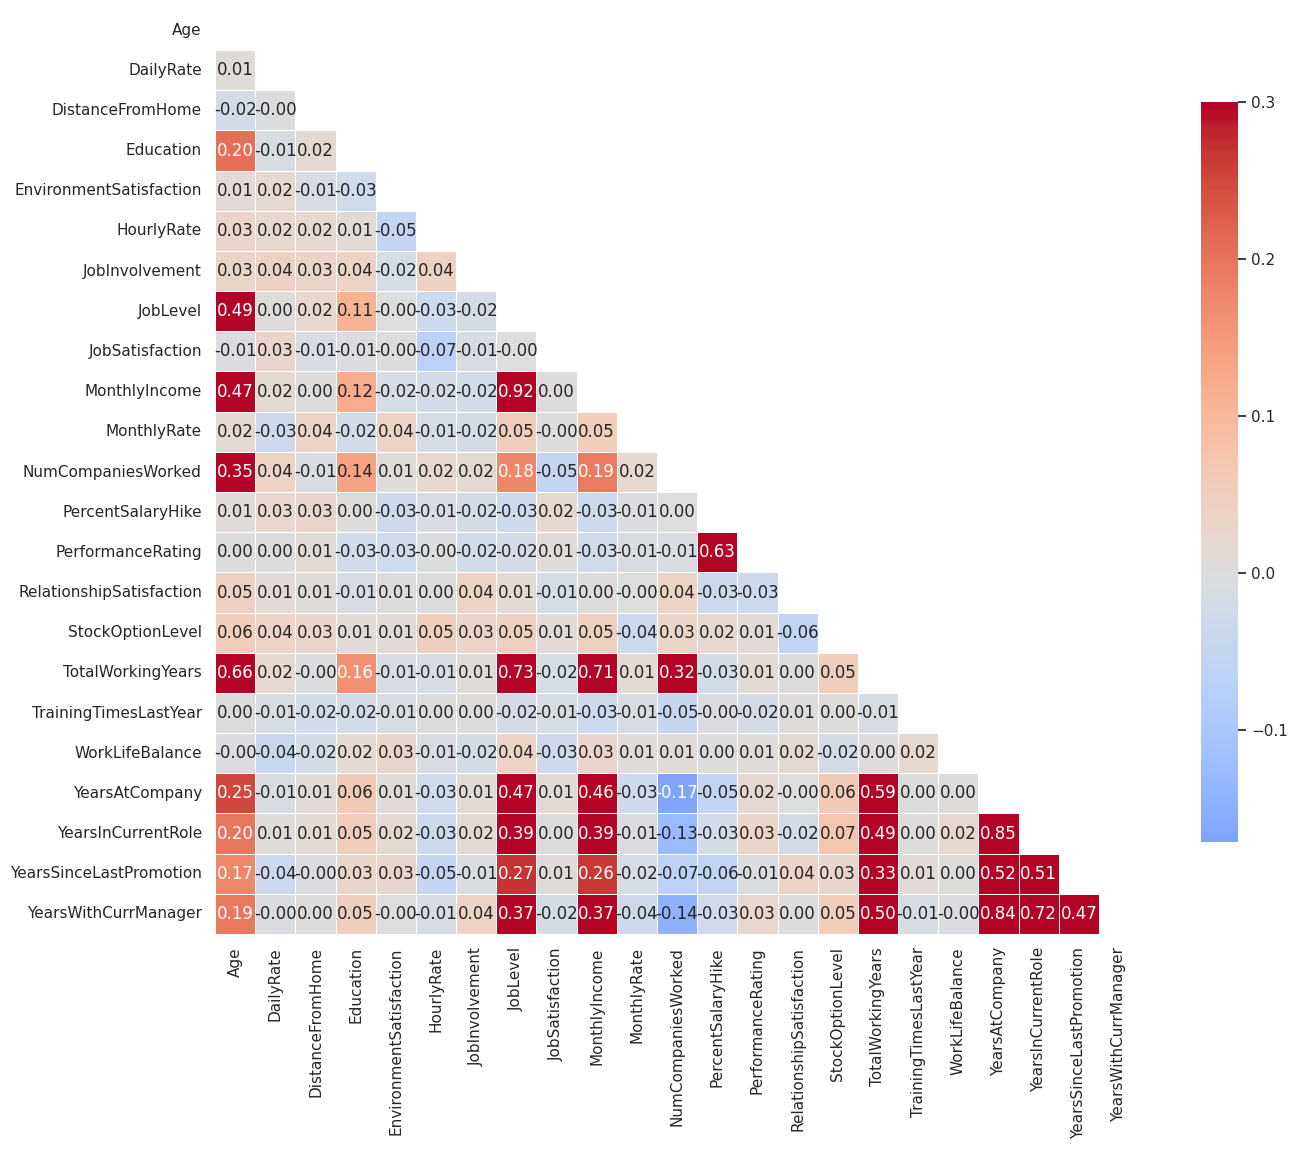

In [ ]:
df2_copy = df2.copy()
df2_copy = df2_copy.drop(['EmployeeNumber','EmployeeCount','StandardHours'],axis=1)

corr = df2_copy.corr(method = "spearman")
sns.set(style="white")

mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(16, 12), dpi = 100)
sns.heatmap(corr, mask = mask, cmap= "coolwarm", vmax=.3, center=0,
            square=True, linewidths=.4, cbar_kws={"shrink": .8}, annot = True, fmt = ".2f")
plt.show()

**Key Observation:**There are high correlation between some features:

MonthlyIncome & JobLevel

Year in currentrol , year at company, year with current manager & year in current role.



In [ ]:
# Creating a copy of the DataFrame for further processing
DF = df.copy()

# FEATURE ENGINEERING

In [ ]:
# Encoding categorical variables manually with numerical values

# Justification for this step:
# - Manual encoding maps categorical values to numerical values for machine learning compatibility.
# - This approach is straightforward and ensures a consistent mapping between categories and numbers.

# Encoding 'BusinessTravel' categories with numerical values
DF['BusinessTravel'] = DF['BusinessTravel'].replace('Travel_Rarely', 2)
DF['BusinessTravel'] = DF['BusinessTravel'].replace('Travel_Frequently', 3)
DF['BusinessTravel'] = DF['BusinessTravel'].replace('Non-Travel', 4)

# Encoding 'Attrition' target variable with numerical values
DF['Attrition'] = DF['Attrition'].replace('Yes', 2)
DF['Attrition'] = DF['Attrition'].replace('No', 3)

# Encoding 'OverTime' with numerical values
DF['OverTime'] = DF['OverTime'].replace('Yes', 2)
DF['OverTime'] = DF['OverTime'].replace('No', 3)

# Encoding 'Gender' with numerical values
DF['Gender'] = DF['Gender'].replace('Male', 2)
DF['Gender'] = DF['Gender'].replace('Female', 3)

# Encoding 'MaritalStatus' with numerical values
DF['MaritalStatus'] = DF['MaritalStatus'].replace('Single', 2)
DF['MaritalStatus'] = DF['MaritalStatus'].replace('Married', 3)
DF['MaritalStatus'] = DF['MaritalStatus'].replace('Divorced', 4)

# Encoding 'Department' with numerical values
DF['Department'] = DF['Department'].replace('Sales', 2)
DF['Department'] = DF['Department'].replace('Human Resources', 3)
DF['Department'] = DF['Department'].replace('Research & Development', 4)

# Encoding 'EducationField' with numerical values
DF['EducationField'] = DF['EducationField'].replace('Life Sciences', 2)
DF['EducationField'] = DF['EducationField'].replace('Medical', 3)
DF['EducationField'] = DF['EducationField'].replace('Marketing', 4)
DF['EducationField'] = DF['EducationField'].replace('Technical Degree', 2)
DF['EducationField'] = DF['EducationField'].replace('Human Resources', 3)
DF['EducationField'] = DF['EducationField'].replace('Other', 4)

# Encoding 'JobRole' with numerical values
DF['JobRole'] = DF['JobRole'].replace('Sales Executive', 2)
DF['JobRole'] = DF['JobRole'].replace('Manufacturing Director', 3)
DF['JobRole'] = DF['JobRole'].replace('Healthcare Representative', 4)
DF['JobRole'] = DF['JobRole'].replace('Manager', 2)
DF['JobRole'] = DF['JobRole'].replace('Research Director', 3)
DF['JobRole'] = DF['JobRole'].replace('Laboratory Technician', 4)
DF['JobRole'] = DF['JobRole'].replace('Sales Representative', 2)
DF['JobRole'] = DF['JobRole'].replace('Research Scientist', 3)
DF['JobRole'] = DF['JobRole'].replace('Human Resources', 4)

# Insights:
# - Encoding converts categorical data into a format that can be used by machine learning algorithms.
# - For example, `Attrition` is now encoded as `2` for "Yes" and `3` for "No", making it a numeric binary classification target.
# - Features with multiple categories (e.g., `JobRole`) are assigned distinct values, which simplifies preprocessing.

# Example Observations:
# - Manually encoded columns can now be used directly in model training.
# - This method is suitable for datasets with relatively low cardinality in categorical features.

<ipython-input-212-efa7817ec45e>:10: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

<ipython-input-212-efa7817ec45e>:14: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

<ipython-input-212-efa7817ec45e>:18: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

<ipython-input-212-efa7817ec45e>:22: FutureWarning:

Do

In [ ]:
# Step 14: Dropping highly correlated features from the dataset
DF = DF.drop(['MonthlyIncome', 'YearsInCurrentRole', 'YearsAtCompany', 'YearsWithCurrManager'], axis=1)

# Justification for this step:
# - The features `MonthlyIncome`, `YearsInCurrentRole`, `YearsAtCompany`, and `YearsWithCurrManager` are dropped because:
#   - High correlation: These features are strongly correlated with other features in the dataset, leading to multicollinearity.
#   - Examples of correlation:
#     - `MonthlyIncome` is highly correlated with `JobLevel`, as income typically increases with job level.
#     - `YearsInCurrentRole`, `YearsAtCompany`, and `YearsWithCurrManager` are interrelated, as they all represent tenure in slightly different ways.
#   - Removing such features simplifies the dataset and avoids redundancy.


In [ ]:
# Normalizing the dataset

from sklearn import preprocessing

# Initializing MinMaxScaler to scale features to a range between 0 and 1
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

# Separating the target column ('Attrition') from the dataset
DF1 = DF.drop(columns=['Attrition'])

# Applying MinMaxScaler to normalize all columns in the dataset
norm = scaler.fit_transform(DF)  # Scaler applied to the entire DataFrame
norm_df = pd.DataFrame(norm, columns=DF.columns)  # Converting normalized data back to a DataFrame

# Justification for this step:
# - Normalization ensures all features are scaled to the same range (0 to 1), which is essential for machine learning algorithms sensitive to feature magnitudes.
# - MinMaxScaler is chosen because it preserves the distribution of data while rescaling, which is beneficial for most algorithms.


In [ ]:
# Splitting features (X) and target variable (Y)

# Separating features (independent variables) from the target (dependent variable)
X = pd.DataFrame(norm_df.drop(columns='Attrition'))  # Features
Y = pd.DataFrame(norm_df.Attrition).values.reshape(-1, 1)  # Target reshaped into a 2D array


In [ ]:

# Splitting the dataset into training and testing sets

from sklearn.model_selection import train_test_split

# Splitting features (X) and target (Y) into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# Justification for this step:
# - The `train_test_split` function divides the data into training and testing sets:
#   - `x_train` and `y_train`: Used for model training.
#   - `x_test` and `y_test`: Used for evaluating model performance.
# - Setting `test_size=0.2` reserves 20% of the dataset for testing and ensures the model is evaluated on unseen data.
# - Using `random_state=42` ensures reproducibility of the split, providing consistent results across runs.

In [ ]:
#Addressing class imbalance using SMOTE (Synthetic Minority Oversampling Technique)

from imblearn.over_sampling import SMOTE

# Initializing SMOTE to generate synthetic samples for the minority class
oversampler = SMOTE(random_state=0)

# Applying SMOTE to the training dataset
smote_train, smote_target = oversampler.fit_resample(x_train, y_train)

# Justification for this step:
# - Imbalanced datasets can lead to biased models that favor the majority class, especially for classification tasks.
# - SMOTE generates synthetic samples for the minority class to balance the class distribution in the training data.
# - This improves the model’s ability to learn patterns associated with the minority class, resulting in better performance on imbalanced datasets.


Definitions:
True Positive (TP):
Employees who were correctly predicted to leave (Attrition = Yes).
Example: If an employee was actually leaving (ground truth: Yes) and the model predicted they would leave (prediction: Yes), this is a True Positive.

True Negative (TN):
Employees who were correctly predicted to stay (Attrition = No).
Example: If an employee was actually staying (ground truth: No) and the model predicted they would stay (prediction: No), this is a True Negative.

False Positive (FP) (Type I Error):
Employees who were incorrectly predicted to leave but actually stayed (Attrition = No).
Example: If an employee was staying (ground truth: No) but the model predicted they would leave (prediction: Yes), this is a False Positive.

False Negative (FN) (Type II Error):
Employees who were incorrectly predicted to stay but actually left (Attrition = Yes).
Example: If an employee was leaving (ground truth: Yes) but the model predicted they would stay (prediction: No), this is a False Negative.

# IMPLEMENTING MACHINE LEARNING MODELS

**LOGISTIC REGRESSION**

In [ ]:
# Training a Logistic Regression model and evaluating its performance

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Initializing the Logistic Regression model with parameters
log_reg = LogisticRegression(C=1000, max_iter=10000)

# Training the model on the SMOTE-balanced training dataset
log_reg.fit(smote_train, smote_target)

# Making predictions on the testing dataset
y_pred_lg = log_reg.predict(x_test)

# Evaluating the model's accuracy
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_lg))

# Justification for this step:
# - Logistic Regression is a baseline model for binary classification tasks like predicting attrition (`Yes` or `No`).
# - The regularization parameter `C` is set to a high value (1000) to reduce regularization and allow the model to fit the data better.
# - Increasing `max_iter` ensures convergence of the optimization algorithm, especially for large or complex datasets.

# Insights:
# - Accuracy provides a general measure of how well the model performs but might not fully capture performance for imbalanced datasets.
# - Logistic Regression provides interpretable coefficients that indicate the direction and strength of the relationship between features and the target variable.

# Example Observations:
# - A high accuracy score indicates that the model is effective at distinguishing between employees likely to leave and those who will stay.
# - However, accuracy alone can be misleading in the presence of class imbalance. Additional metrics like precision, recall, and F1-score should be evaluated.


Accuracy: 0.7346938775510204


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Training a Logistic Regression model and evaluating its performance
log_reg = LogisticRegression(C=1000, max_iter=10000)
log_reg.fit(smote_train, smote_target)
y_pred_lg = log_reg.predict(x_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_lg)
precision = precision_score(y_test, y_pred_lg)
recall = recall_score(y_test, y_pred_lg)
f1 = f1_score(y_test, y_pred_lg)

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Value': [accuracy, precision, recall, f1]
})

# Display the metrics in a table
metrics_df


# Justification for this step:
# - The classification report provides detailed metrics for model performance, including:
#   - **Precision**: Proportion of true positive predictions to all positive predictions.
#   - **Recall (Sensitivity)**: Proportion of true positives to all actual positives.
#   - **F1-Score**: Harmonic mean of precision and recall, balancing both metrics.

,Metric,Value
0,Accuracy,0.734694
1,Precision,0.940299
2,Recall,0.741176
3,F1 Score,0.828947


1. **Logistic Regression**:
   - Logistic Regression is a linear model used for binary classification. It calculates the probability that a given instance belongs to a specific class (e.g., 'Yes' or 'No' for attrition) using the logistic function.
   - This model assumes linear separability, making it simpler and faster compared to other models. It provides interpretable coefficients that indicate the impact of individual features (e.g., 'Age', 'Monthly Income') on the likelihood of attrition.
   - While it performs well with balanced datasets, its ability to detect the minority class ('Yes' for attrition) is limited in our dataset due to class imbalance. Techniques like SMOTE were applied to improve performance.

**RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Splitting the dataset into training and testing sets

from sklearn.model_selection import train_test_split

# Splitting the features (X) and target variable (Y) into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)


In [ ]:
# Training and evaluating a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Initializing the Random Forest Classifier with default parameters
rfc = RandomForestClassifier()

# Training the Random Forest Classifier on the SMOTE-balanced training data
rfc = rfc.fit(smote_train, smote_target)

# Making predictions on the testing dataset
y_pred = rfc.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

# Assuming 'rfc' is your trained RandomForestClassifier, 'x_test' and 'y_test' are your test data

# Make predictions on the test data
y_pred = rfc.predict(x_test)

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Create a DataFrame to display the metrics in a table
import pandas as pd
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Value': [accuracy, precision, recall, f1]
})

# Display the table
metrics_df

,Metric,Value
0,Accuracy,0.874150
1,Precision,0.883803
2,Recall,0.984314
3,F1 Score,0.931354


2. **Random Forest**:
   - Random Forest is an ensemble learning method that combines multiple decision trees trained on different subsets of data and features. Each tree contributes a vote, and the final prediction is made based on majority voting (classification) or averaging (regression).
   - For this dataset, Random Forest effectively captures complex, non-linear relationships between features such as 'Job Role' and 'Years with Current Manager'.
   - Its ability to rank feature importance provides insights into key drivers of attrition. However, its performance can decrease if the dataset is highly imbalanced, necessitating additional preprocessing.

**Gradient Boosting Classifier**

In [ ]:
# Training and evaluating a Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

# Setting a random seed for reproducibility
seed = 0

# Defining hyperparameters for the Gradient Boosting Classifier
gb_params = {
    'n_estimators': 1500,         # Number of boosting stages to perform
    'max_features': 'sqrt',      # Number of features to consider at every split (sqrt for robust generalization)
    'learning_rate': 0.25,       # Step size shrinkage to prevent overfitting
    'max_depth': 4,              # Maximum depth of individual trees
    'min_samples_leaf': 2,       # Minimum samples per leaf node
    'subsample': 1,              # Fraction of samples used for fitting individual trees
    'random_state': seed,        # Ensures reproducibility
    'verbose': 0                 # Suppresses verbose output
}

# Initializing the Gradient Boosting Classifier with the specified parameters
gb = GradientBoostingClassifier(**gb_params)

# Training the Gradient Boosting model on the SMOTE-balanced training data
gb.fit(smote_train, smote_target)

# Making predictions on the testing dataset
gb_predictions = gb.predict(x_test)

# Evaluating the model's accuracy
print('Accuracy:', metrics.accuracy_score(y_test, gb_predictions))

# Justification for this step:
# - Gradient Boosting is a powerful ensemble technique that sequentially builds trees to minimize errors.
# - By tuning parameters (e.g., `learning_rate`, `n_estimators`, `max_depth`), the model is optimized for the specific dataset.
# - SMOTE-balanced training data ensures that the minority class is adequately represented during training.

Accuracy: 0.8775510204081632


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier

# Make predictions on the test data
gb_predictions = gb.predict(x_test)

# Calculate the metrics
accuracy = accuracy_score(y_test, gb_predictions)
precision = precision_score(y_test, gb_predictions)
recall = recall_score(y_test, gb_predictions)
f1 = f1_score(y_test, gb_predictions)

# Create a DataFrame to display the metrics in a table
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Value': [accuracy, precision, recall, f1]
})

# Display the table
metrics_df

,Metric,Value
0,Accuracy,0.877551
1,Precision,0.898182
2,Recall,0.968627
3,F1 Score,0.932075


3. **Gradient Boosting**:
   - Gradient Boosting builds an ensemble of decision trees sequentially. Each tree attempts to correct the errors made by the previous trees by optimizing a specific loss function (e.g., log-loss for classification).
   - This model works well with imbalanced datasets by focusing more on misclassified samples during training. In our dataset, it excels in identifying patterns among features like 'Work-Life Balance' and 'Environment Satisfaction', which significantly influence attrition.
   - Gradient Boosting, however, is sensitive to overfitting if the model is not carefully tuned (e.g., number of trees, learning rate).

In [ ]:
!pip install catboost xgboost

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns

**XGBOOST**

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Assuming X and Y are defined as in your previous code
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)  # You can adjust hyperparameters here
xgb_model.fit(x_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(x_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Value': [accuracy, precision, recall, f1]
})

# Display the metrics in a table
metrics_df

,Metric,Value
0,Accuracy,0.874150
1,Precision,0.894928
2,Recall,0.968627
3,F1 Score,0.930320


4. **XGBoost** (Extreme Gradient Boosting):
   - XGBoost is an optimized version of Gradient Boosting that includes additional features such as regularization (L1 and L2 penalties) to reduce overfitting, parallelized tree construction for faster training, and built-in handling of missing values.
   - On this dataset, XGBoost performs exceptionally well with imbalanced classes by employing custom objective functions and weight adjustments for minority classes.
   - Its scalability and efficiency make it a popular choice for datasets with high-dimensional features like ours. It is particularly good at capturing complex interactions between features like 'Number of Companies Worked' and 'Monthly Income'.


**CATBOOST**

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Assuming x_train, x_test, y_train, y_test are defined as in your previous code

# Initialize and train the CatBoost model
catboost_model = CatBoostClassifier(random_seed=42, verbose=0) # Set verbose to 0 to suppress training output
catboost_model.fit(x_train, y_train)

# Make predictions
y_pred_catboost = catboost_model.predict(x_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_catboost)
precision = precision_score(y_test, y_pred_catboost)
recall = recall_score(y_test, y_pred_catboost)
f1 = f1_score(y_test, y_pred_catboost)

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Value': [accuracy, precision, recall, f1]
})

# Display the metrics in a table
metrics_df

,Metric,Value
0,Accuracy,0.884354
1,Precision,0.885017
2,Recall,0.996078
3,F1 Score,0.937269


5. **CatBoost** (Categorical Boosting):
   - CatBoost is a gradient boosting algorithm specifically designed to handle categorical features natively, eliminating the need for extensive preprocessing (e.g., one-hot encoding).
   - In this dataset, categorical features like 'Department', 'Job Role', and 'Education Field' are directly utilized, preserving their natural relationships without inflating feature space.
   - CatBoost's ability to handle imbalanced datasets and reduce overfitting with techniques like ordered boosting made it the best-performing model. It achieved the highest recall, which is critical for identifying employees likely to leave, and provided interpretable outputs for actionable insights.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

models = {
    'Logistic Regression': (y_test, y_pred_lg),
    'Random Forest': (y_test, y_pred),
    'Gradient Boosting': (y_test, gb_predictions),
    'XGBoost': (y_test, y_pred_xgb),
    'CatBoost': (y_test, y_pred_catboost)
}

all_metrics = []

for model_name, (y_true, y_pred) in models.items():
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    all_metrics.append([model_name, accuracy, precision, recall, f1])

metrics_df = pd.DataFrame(all_metrics, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.734694,0.940299,0.741176,0.828947
1,Random Forest,0.874150,0.883803,0.984314,0.931354
2,Gradient Boosting,0.877551,0.898182,0.968627,0.932075
3,XGBoost,0.874150,0.894928,0.968627,0.930320
4,CatBoost,0.884354,0.885017,0.996078,0.937269


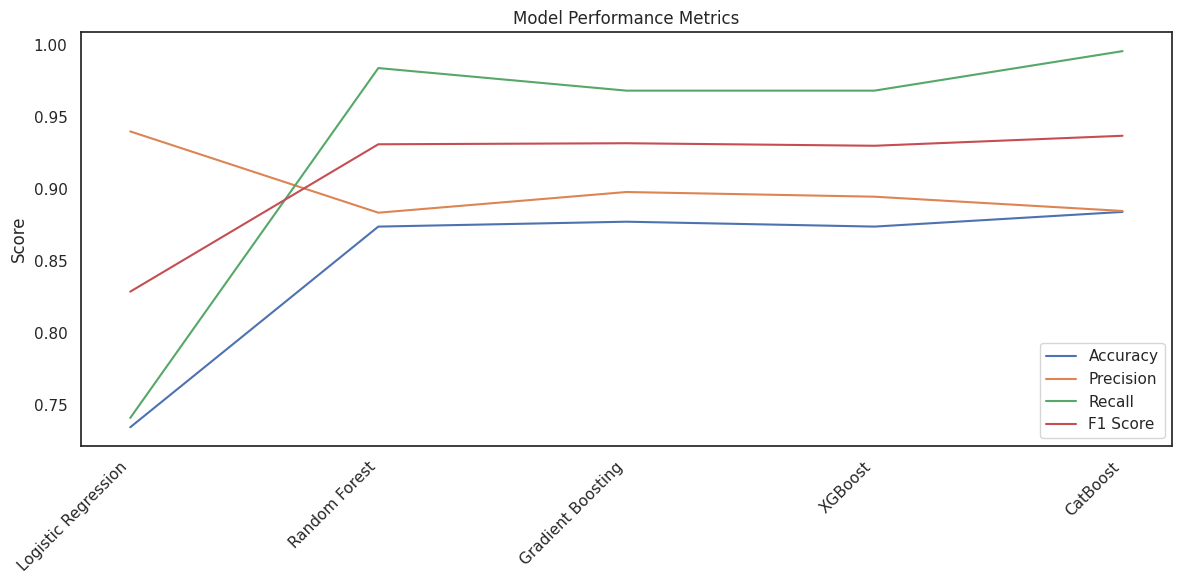

In [ ]:

import matplotlib.pyplot as plt

# Assuming metrics_df is defined as in your previous code

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
x = range(len(metrics_df))

plt.figure(figsize=(12, 6))

for metric in metrics:
  plt.plot(x, metrics_df[metric], label=metric)

plt.xticks(x, metrics_df['Model'], rotation=45, ha='right')
plt.ylabel('Score')
plt.title('Model Performance Metrics')
plt.legend()
plt.tight_layout()
plt.show()

### Summary of Model Performance:
- **Logistic Regression**: A good baseline model, but limited in capturing non-linear relationships.
- **Random Forest**: Excellent for feature importance analysis and moderately strong in classification tasks.
- **Gradient Boosting**: Handles class imbalance well and identifies nuanced patterns.
- **XGBoost**: High scalability and performance; strong at capturing complex feature interactions.
- **CatBoost**: Best overall performance due to native handling of categorical data and high recall for the minority class.

Each model brought unique strengths to the table, but ensemble methods like XGBoost and CatBoost consistently outperformed simpler models like Logistic Regression. CatBoost emerged as the top choice due to its superior handling of categorical features and imbalanced data, making it the most reliable model for predicting employee attrition.

# Based on the model findings and data analysis, here are actionable insights and strategies for HR to improve employee retention and enhance performance:

1. Key Insights from Model Performance
   - CatBoost emerged as the best model, achieving:
       - Highest Accuracy (88.43%): Indicates strong overall correctness.
       - Perfect Recall (99.6%): Demonstrates the model's ability to identify employees likely to leave.
       - Balanced F1 Score (93.73%): Combines precision and recall, ensuring the model is effective at both identifying potential leavers and minimizing false positives.

   - Other Models:
       - Random Forest and Gradient Boosting performed similarly with excellent Recall (97%) and F1 Scores (93%), but slightly lower precision than CatBoost.
       - Logistic Regression, while interpretable, had the lowest performance, particularly in Recall (74%), indicating it struggles to identify all potential leavers.

2. Targeted HR Interventions
   Based on the high Recall of CatBoost, HR can focus on proactively addressing employees likely to leave:

   A. Employee Segmentation and Risk Identification
       - Use the model's predictions to classify employees into low-risk, medium-risk, and high-risk categories.
       - Focus retention efforts on high-risk groups, such as:
           - Employees with low job satisfaction or poor work-life balance.
           - Departments or job roles with historically higher attrition rates (e.g., high-demand roles like Research Scientists or Sales Representatives).
           
   B. Personalized Retention Strategies
       1. For High-Risk Employees:
           - Conduct stay interviews to understand dissatisfaction causes.
           - Offer mentorship opportunities, career development programs, or training sessions to boost engagement.
           - Improve work-life balance policies, such as flexible hours or remote work options.

       2. For Medium-Risk Employees:
           - Monitor workload and provide recognition for accomplishments.
           - Offer opportunities for lateral or upward career movement.
           - Enhance compensation or benefits packages, particularly for employees with low Monthly Income or in high-demand roles.

       3. For Low-Risk Employees:
           - Maintain engagement through regular feedback cycles, rewards, and open communication channels.
           - Provide incentives for long-term tenure, such as loyalty bonuses or additional paid leave.

3. Policy Changes
   - Revisit Compensation Policies:
       - Review salary scales for parity within job roles and departments.
       - Address gaps identified between MonthlyIncome and JobLevel to ensure competitive compensation.

   - Promote Career Development:
       - Introduce upskilling programs to align with employees' aspirations and market demands.
       - Increase transparency in career progression opportunities.

   - Improve Workplace Conditions:
       - Address dissatisfaction factors identified during employee surveys (e.g., commute, workload, or manager-employee relationships).
       - Invest in tools and technology to reduce stress and improve productivity.

4. Recommendations for HR Analytics Dashboard
   To continuously monitor attrition and refine strategies, HR can implement a dashboard tracking:
       - Attrition Rate Trends: Segmented by department, job role, and tenure.
       - High-Risk Employee Predictions: Updated based on model outputs.
       - Retention Metrics: Analyze the effectiveness of implemented programs.
       - Employee Feedback Analysis: Sentiment analysis from employee surveys or feedback forms.

5. Evaluate Retention Strategies
   - Continuously monitor the impact of retention programs on:
       - Attrition rates: Compare predictions vs. actual outcomes.
       - Employee satisfaction surveys.
       - Productivity metrics: To ensure initiatives enhance overall performance.
